# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# Ex 2.1: Load the data using Pandas read_csv, use `show_id` as the index_col parameter. 

data_path = "/Users/edenschreurs/Documents/IPL EAE code/eae_ipld_project_Eden/data/netflix_titles.csv"

movies_df = pd.read_csv(data_path, index_col='show_id')

print(movies_df)

            type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
...          ...                    ...              ...   
s8803      Movie                 Zodiac    David Fincher   
s8804    TV Show            Zombie Dumb              NaN   
s8805      Movie             Zombieland  Ruben Fleischer   
s8806      Movie                   Zoom     Peter Hewitt   
s8807      Movie                 Zubaan      Mozez Singh   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  Unite

In [14]:
# Ex 2.2: What is the min and max release years?

min_year = movies_df["release_year"].min()
max_year = movies_df["release_year"].max()

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [17]:
# Ex 2.3: How many director names are missing values (NaN)?

num_missing_directors = movies_df["director"].isnull().sum()

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [56]:
# Ex 2.4: How many different countries are there in the data?

# You will need to fill the NaN (missing) values with the string "Unknown" first.

movies_df["country"].fillna("Unknown", inplace=True)

# Then list the unique entries. As some of them are lists of countries already, because that movie/series was produced in multiple countries, 
# you will need to join with ", " all the elements of the list into a single string, and then split it by ", " to get a list of all the individual countries.

unique_countries = movies_df["country"].unique().tolist()

all_countries_str = ', '.join(unique_countries)

split_all_countries = all_countries_str.split(', ')

#print(split_all_countries)

# Finally, you can get the number of unique countries by getting the length of the list of unique countries, you can use a set {} to get the unique countries or convert the entire
# list into a pd.Series and use .unique() to get the list of unique countries and then its number.

country_list_new = []

for country in split_all_countries:
    if country not in country_list_new and country != "" and "," not in country:
        country_list_new.append(country)


#print(sorted(country_list_new))

n_countries = len(country_list_new)

print(f"There are {n_countries} different countries in the data")

There are 123 different countries in the data


In [96]:
# Ex 2.5: How many characters long are on average the title names?
 
# hint: (create a new column with the titles length if needed, you can use the apply method like .apply(lambda x: len(x)) , then get the mean of that column)

movies_df['Title_Length'] = movies_df['title'].apply(lambda x: len(x))

#print(movies_df)

avg_title_length = movies_df['Title_Length'].mean()

print(f"The average title length is {avg_title_length} characters")

            type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
...          ...                    ...              ...   
s8803      Movie                 Zodiac    David Fincher   
s8804    TV Show            Zombie Dumb              NaN   
s8805      Movie             Zombieland  Ruben Fleischer   
s8806      Movie                   Zoom     Peter Hewitt   
s8807      Movie                 Zubaan      Mozez Singh   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  Unite

country
United States                            33
India                                    16
United States, United Kingdom             4
United States, Canada                     3
Japan                                     2
Thailand                                  2
Canada                                    2
Egypt                                     2
United States, Australia                  1
United States, United Kingdom, Canada     1
Name: count, dtype: int64


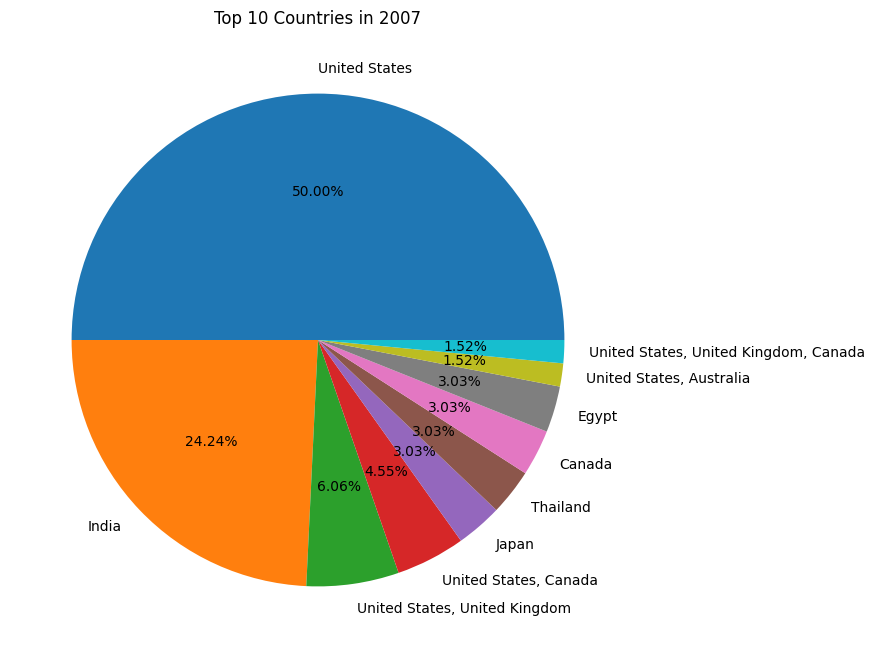

In [94]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

# It's optional to clean or modify the data of countries in this case, you can just use the data as it is.

# hint: (you can use the .loc method to filter the data by year, and then use the .value_counts() method to get the number of movies and series combined for each country, 
# finally use the head(10) method to get the top 10 countries)

year = 2007   # you can try to change the year to see the results for different years 

filtering_year = movies_df.loc[movies_df["release_year"]==year]
top_10_countries = pd.Series(filtering_year["country"].value_counts().head(10))

print(top_10_countries)

# Code to plot the pie chart from your data results
fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


            type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
...          ...                    ...              ...   
s8803      Movie                 Zodiac    David Fincher   
s8804    TV Show            Zombie Dumb              NaN   
s8805      Movie             Zombieland  Ruben Fleischer   
s8806      Movie                   Zoom     Peter Hewitt   
s8807      Movie                 Zubaan      Mozez Singh   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  Unite

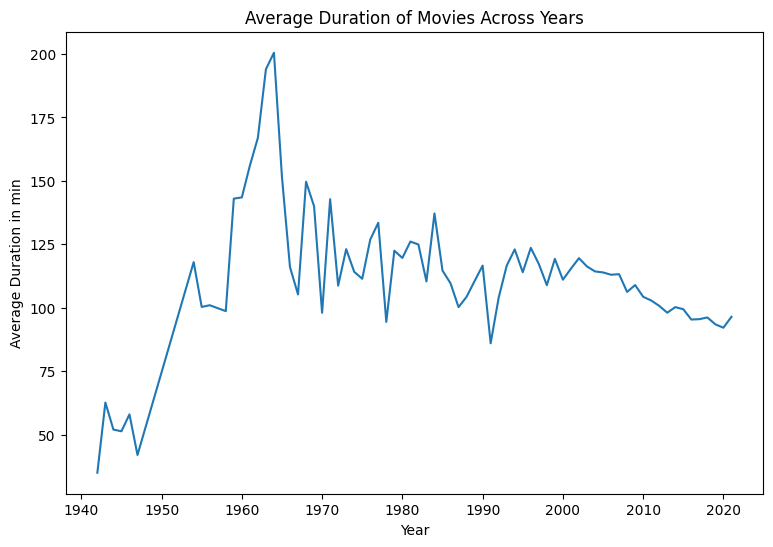

In [104]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. -- use same as before lambda to only include when x has MIN, inserting an integer of the run time number and exclude all SEASONS (just 2 lines) 

# (hint: you can create a new column with the integer value of the minutes of the movies, it's possible to do it with the .apply()
# method and a lambda function, getting only stripping the minutes of it and converting the digit number to an integer
# or you can also do this process with a for loop over the dataframe rows like <for row_id, row in df.iterrows(): > creating every new value of that row for the new column
# Then use groupby year and in order to average on that movies minutes column)

import pandas as pd
import matplotlib.pyplot as plt

movies_df['Average_duration'] = movies_df['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else None)

print(movies_df)

movies_avg_duration_per_year = movies_df.groupby('release_year')['Average_duration'].mean()


fig = plt.figure(figsize=(9, 6))

#TODO: generate the line plot using plt.plot() and the information from movies_avg_duration_per_year (the vertical axis with the minutes value) and its index (the horizontal axis with the years)

plt.plot(movies_avg_duration_per_year.index, movies_avg_duration_per_year.values, linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average Duration in min')
plt.title("Average Duration of Movies Across Years")

plt.show()